# Fetch dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
dermatology = fetch_ucirepo(id=33) 

# data (as pandas dataframes) 

In [5]:
X = dermatology.data.features 
y = dermatology.data.targets 

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
# Handle missing values if any
X = X.replace('?', np.nan)
X = X.apply(pd.to_numeric)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [3]:
def evaluate_naive_bayes(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report

/home/hassan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hassan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hassan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train/Test Split: 60-40
Accuracy: 0.8775510204081632
Confusion Matrix:
[[52  0  0  0  0  0]
 [ 0  7  0 13  4  0]
 [ 0  0 27  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  1  0  0 20  0]
 [ 0  0  0  0  0  5]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        52
           2       0.88      0.29      0.44        24
           3       1.00      1.00      1.00        27
           4       0.58      1.00      0.73        18
           5       0.83      0.95      0.89        21
           6       1.00      1.00      1.00         5

    accuracy                           0.88       147
   macro avg       0.88      0.87      0.84       147
weighted avg       0.90      0.88      0.86       147





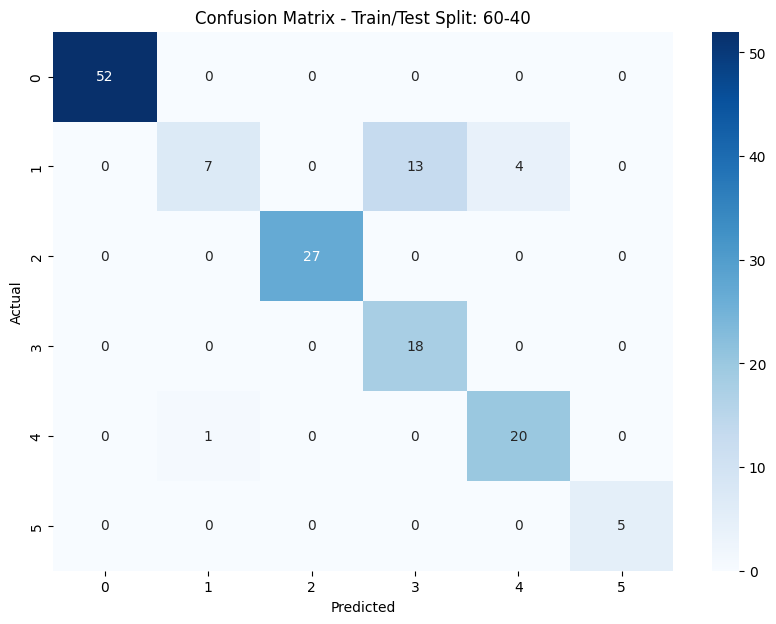

Train/Test Split: 70-30
Accuracy: 0.8727272727272727
Confusion Matrix:
[[40  0  0  0  0  0]
 [ 0  3  0 11  2  0]
 [ 0  0 19  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  1  0  0 15  0]
 [ 0  0  0  0  0  4]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.75      0.19      0.30        16
           3       1.00      1.00      1.00        19
           4       0.58      1.00      0.73        15
           5       0.88      0.94      0.91        16
           6       1.00      1.00      1.00         4

    accuracy                           0.87       110
   macro avg       0.87      0.85      0.82       110
weighted avg       0.89      0.87      0.85       110





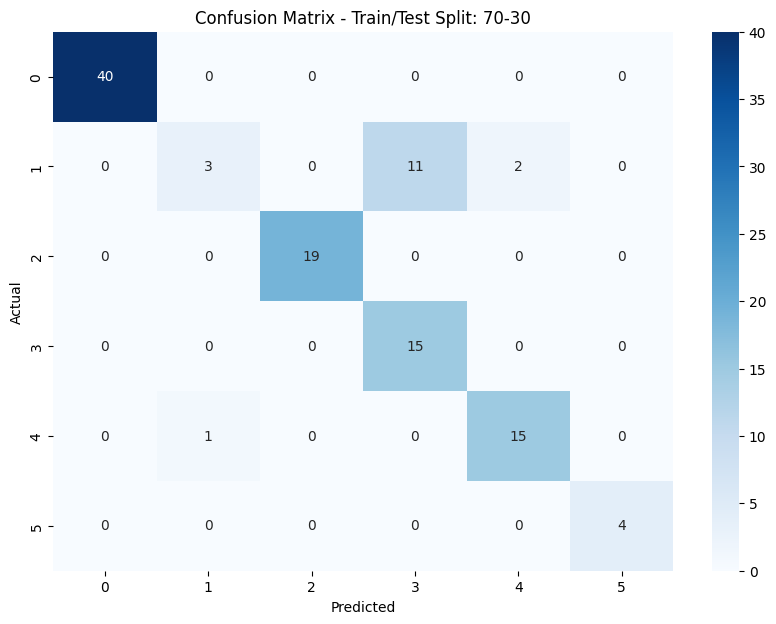

Train/Test Split: 80-20
Accuracy: 0.9054054054054054
Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0  3  0  4  2  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  1  0  0  9  0]
 [ 0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.75      0.33      0.46         9
           3       1.00      1.00      1.00        13
           4       0.67      1.00      0.80         8
           5       0.82      0.90      0.86        10
           6       1.00      1.00      1.00         3

    accuracy                           0.91        74
   macro avg       0.87      0.87      0.85        74
weighted avg       0.91      0.91      0.89        74





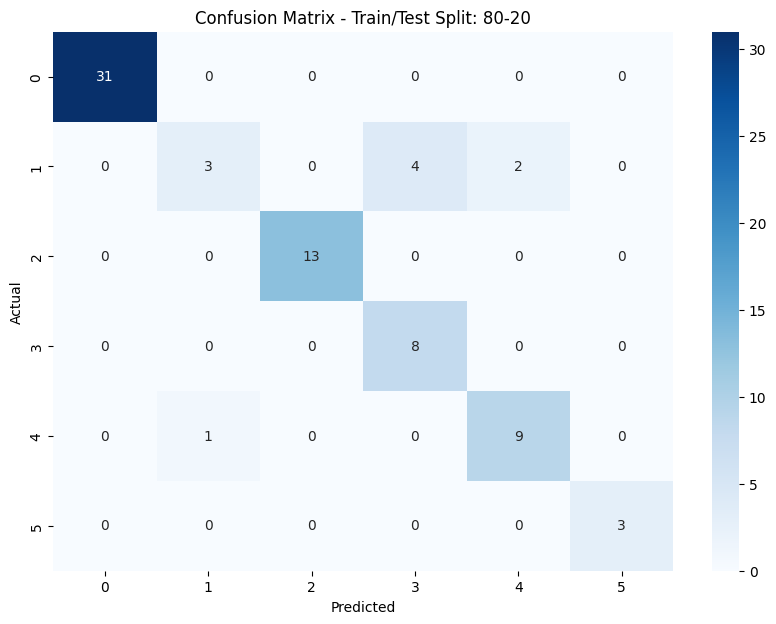

Analysis of the effect of varying train/test split:
Train/Test Split: 60-40 - Accuracy: 0.8776
Train/Test Split: 70-30 - Accuracy: 0.8727
Train/Test Split: 80-20 - Accuracy: 0.9054


In [4]:
splits = [(0.4, "60-40"), (0.3, "70-30"), (0.2, "80-20")]

results = {}
for test_size, split_name in splits:
    accuracy, conf_matrix, class_report = evaluate_naive_bayes(X, y, test_size)
    results[split_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report
    }

for split_name, result in results.items():
    print(f"Train/Test Split: {split_name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['class_report'])
    print("\n")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Train/Test Split: {split_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Analyze the effect of varying train/test split
print("Analysis of the effect of varying train/test split:")
for split_name, result in results.items():
    print(f"Train/Test Split: {split_name} - Accuracy: {result['accuracy']:.4f}")